## [EAA - ARC Python Primer for Accounting Research](https://martien.netlify.app/book/example/)

#### This notebook explains how to import data from file and from remote data sources. 
---

The cells below demonstrate how to import of the following formats:

- CSV
- Excel
- Google sheets
- Json

For CSV and Excel files the notebook will also show how to export.

I will not discuss at length the import of the following (and other) formats, mainly because it is straightforward, seamless. I refer to the Pandas documentation:
- SAS [sas7bdat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sas.html).
- Stata [dta](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html).
- SPSS [sav](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_spss.html).


This session is the last of the introductory sessions and prepares you for the next session which will dig deeper into data analysis.

---
Prepare your environment:

In [1]:
import os
import pandas as pd
import numpy as np
if os.name=='nt':  # for Windows users
    os.chdir('D:/users/martien/EAA_python/code/')  # note the forward slashes, change 'martien' to your user name
else:
    os.chdir('/home/martien/EAA_python/code/')  # For Linux or Mac     

---

#### CSV
The previous session demonstrated the import of a comma-separated (csv) file. The file used in that session was not a standard file, it had a typical field separator (^), and it was big and compressed. This required us to set some of the import parameters.

However, in many cases importing data into a pandas data frame is straightforward. See the example below, where I import the file "gle.csv", which is from research that I conduct with Roger Willett, see this [paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3531319). We use the csv file for making a graph with [GLE](http://www.gle-graphics.org/), but GLE has limitations. I now prefer using Python for graphs.

Note the LaTeX headers in the csv file, which are, except for `year`, designated by dollar signs: `$\mu$, $\mu_{dp}$`

In [2]:
df = pd.read_csv("gle.csv")
df.head()

,year,$\mu$,$\mu_{dp}$
0,1971,1.665415,1.627477
1,1972,1.372833,1.397125
2,1973,0.949864,0.978074
3,1974,0.684375,0.715655
4,1975,0.863134,0.868401


---

##### Indexing

Indexing is one of the most powerful features of pandas. I will come back to that in next sessions, but for now you should get into the habit of assigning an index to your data frame. The index preferably should have unique values. You can have multi-dimensional indices as well, like firm-year identifiers, but let's stick to a uni-dimensional index for now.

Looking at the data frame above, you will see the sequence of numbers: 0-4. This is the current index. These numbers are kinda useless. 

Why is it useless? Well, for example, if we want to plot the data we get:

<AxesSubplot:>

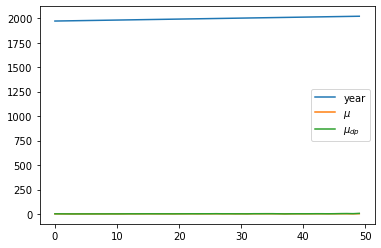

In [3]:
df.plot()

Let's set the year as an index, and then plot again:

In [4]:
df = df.set_index("year")
df.head()

,$\mu$,$\mu_{dp}$
year,,
1971,1.665415,1.627477
1972,1.372833,1.397125
1973,0.949864,0.978074
1974,0.684375,0.715655
1975,0.863134,0.868401


<AxesSubplot:xlabel='year'>

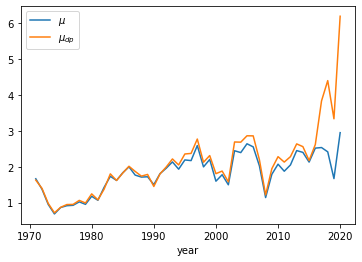

In [5]:
df.plot()

Indexes have more advantages. For example, they make joining and splitting data frames very easy. 

You can also easily manipulate the data once you assign an index. 

For example: lets multiply all values of the data frame by 2, without worrying about the year-column. 

In [6]:
df *= 2
df.head()

,$\mu$,$\mu_{dp}$
year,,
1971,3.330830,3.254953
1972,2.745665,2.794249
1973,1.899728,1.956148
1974,1.368750,1.431311
1975,1.726269,1.736801


In next sessions I will explore indexes further. 

---
**Exporting CSV files**

Exporting csv files is easy, but I encourage you to compress the data to save space.

Pandas will automatically read the compressed file.

In [7]:
df.to_csv('gle_uncompressed.csv')  # not compressed
df.to_csv('gle_compressed.csv.gz', compression = "gzip")  # compressed with gzip, but zip should work as well

In [8]:
pd.read_csv('gle_compressed.csv.gz').set_index("year").head(2)  # Pandas reads and decompresses the compressed file

,$\mu$,$\mu_{dp}$
year,,
1971,3.330830,3.254953
1972,2.745665,2.794249


---

#### Excel

Let's use data from the   Australian Prudential Regulation Authority (APRA) to demonstrate the import of Excel files. 

Download the `Monthly authorised deposit-taking institution statistics back-series March 2019 - ...  XLSX ` files from the [APRA website](https://www.apra.gov.au/monthly-authorised-deposit-taking-institution-statistics) to the folder you designated above.

Note that we need to tell Pandas that the data is in sheet `Table 1`.

Note that python may throw an error if you want to import an Excel file for the first time. See solutions [here](https://stackoverflow.com/questions/64432641/pandas-and-xlrd-error-while-reading-excel-files) and [here](https://techoverflow.net/2021/08/01/how-to-fix-pandas-pd-read_excel-error-xlrderror-excel-xlsx-file-not-supported/).

In [9]:
# Reading the data:
fn = 'Monthly authorised deposit-taking institution statistics back-series March 2019 - October 2021.xlsx'
df = pd.read_excel(fn, sheet_name='Table 1')

In [10]:
df.head(2)

,($million),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Period,ABN,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
1,2021-10-31 00:00:00,13621804813,86 400 Ltd,38.2,0,262.8,0,1429.3,0,0,...,0,0,0,0,0,580,0,627.5,0,1207.5


Unfortunately this does not look great, because of the weird header information. 

We can do better by telling Pandas to skip the first row, i.e. row zero.

In [11]:
df = pd.read_excel(fn, sheet_name='Table 1', skiprows=[0])
df.head(2)

,Period,ABN,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
0,2021-10-31,13621804813,86 400 Ltd,38.2,0.0,262.8,0.0,1429.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,580.0,0.0,627.5,0.0,1207.5
1,2021-10-31,70744009137,ABN AMRO Bank N.V.,0.9,0.0,40.0,0.0,69.0,0.0,67.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Set the index to bank id (ABN) and period:

In [12]:
idx_list = list(df)[:2][::-1]  # me being lazy - I want the names of the first two columns, reversing order
df = df.set_index(idx_list)
df.head(2)

,,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
ABN,Period,,,,,,,,,,,,,,,,,,,,,
13621804813,2021-10-31,86 400 Ltd,38.2,0.0,262.8,0.0,1429.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,580.0,0.0,627.5,0.0,1207.5
70744009137,2021-10-31,ABN AMRO Bank N.V.,0.9,0.0,40.0,0.0,69.0,0.0,67.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note the index headers 'ABN' and  'Period' are in bold.

---

Let's assign the observations of Abn Amro (with id 70744009137) to a new data frame. We can easily do that using `loc`:

In [13]:
df_aab = df.loc[70744009137]
df_aab.head(2)

,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
Period,,,,,,,,,,,,,,,,,,,,,
2021-10-31,ABN AMRO Bank N.V.,0.9,0.0,40.0,0.0,69.0,0.0,67.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30,ABN AMRO Bank N.V.,1.2,0.0,55.2,0.0,69.3,0.0,67.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's plot `Total residents assets` of that bank:

<AxesSubplot:xlabel='Period'>

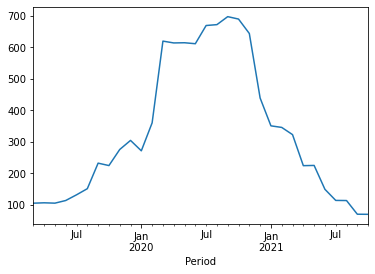

In [14]:
df_aab['Total residents assets'].plot()

---

**Retrieving multiple sheets**

You may have noticed that loading Excel files takes time. This is irritating, especially if you want to open multiple sheets from one single Excel file. 

Pandas allows you to load it in full in one go.

You can then choose the sheets you want to assign to a data frame.

To make this work we load the Excel file from the web into a dictionary. Once in the dictionary we can choose the sheets we need:

In [15]:
sheets_dict = pd.read_excel(fn, sheet_name=None)
for name, sheet in sheets_dict.items():
    print(name)

Cover
Notes
Contents
Table 1
Revisions
Explanatory notes


Obtain the relevant table:    

In [16]:
df = sheets_dict['Table 1']
df.head(2)

,($million),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Period,ABN,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
1,2021-10-31 00:00:00,13621804813,86 400 Ltd,38.2,0,262.8,0,1429.3,0,0,...,0,0,0,0,0,580,0,627.5,0,1207.5


But note: we should fix the column headers, which can be done like this:

In [17]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:]             #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.set_index(idx_list)
df.head(2)

,,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
ABN,Period,,,,,,,,,,,,,,,,,,,,,
13621804813,2021-10-31,86 400 Ltd,38.2,0,262.8,0,1429.3,0,0,0,0,...,0,0,0,0,0,580,0,627.5,0,1207.5
70744009137,2021-10-31,ABN AMRO Bank N.V.,0.9,0,40,0,69,0,67.2,0,0,...,0,0,0,0,0,0,0,0,0,0


The advantage of using the dictionary is that the data it holds stays the same. So, if we ruin the data frame (df), we can retrieve it from the dictionary using the code from the two cells above. That saves us from re-loading it.

---
**Exporting Excel files**

There are two main ways to export data to Excel. The first follows the same approach as we took for csv export: 

`df.to_excel('my_first_pandas_export.xlsx')`.

You don't have to worry about compression because that is done automatically.

The second way is to open an Excel file and add various data frames as separate sheets.

The example below shows how to save data from the Big 4 banks (ANZ, CBA, Westpac, NAB)) to separate sheets. We first create a dictionary with the bank names and id's. We then iterate over the dictionary to save the sheets:

In [18]:
big4 = dict(zip(['ANZ','CBA','Westpac','NAB'], [11005357522, 48123123124, 33007457141, 12004044937]))
big4

{'ANZ': 11005357522,
 'CBA': 48123123124,
 'Westpac': 33007457141,
 'NAB': 12004044937}

In [19]:
writer = pd.ExcelWriter('big4-Oz-banks.xlsx')
for name, id in big4.items():
    print(id, name)
    df.loc[id].to_excel(writer,sheet_name=name)
writer.save()

11005357522 ANZ
48123123124 CBA
33007457141 Westpac
12004044937 NAB


---

#### Google sheets

There are various ways to import data from Google sheets. See, for example this solution from [Stack Overflow](stackoverflow), or this one from [Towards Data science](https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550).

Below is an example that works for me.

To make it work, you should use this part from the Google sheet url:

`https://docs.google.com/spreadsheets/d/1bqeBufOalp8TQWizGc_tcB_5Ft7EmAiIkliWKzacNfk`.

Then add to the end of that string: `/export?format=csv&gid=0`

In [20]:
from io import BytesIO
import requests
url = "https://docs.google.com/spreadsheets/d/1bqeBufOalp8TQWizGc_tcB_5Ft7EmAiIkliWKzacNfk/export?format=csv&gid=0"
r = requests.get(url)
data = r.content

df = pd.read_csv(BytesIO(data))
df['id'] += 1
df.set_index(['id', 'period'], inplace = True)

In [21]:
df.head()

mv     bv
id period                 
4  201212  24287.53  7.302
   201312  25207.21  6.407
   201412  32352.41  6.001
   201512  47630.66  5.923
   201612  31109.20  5.578

---

#### Json data

Json data can be easily scraped from the web and included in a data frame using the normalize function. 

See an example below for downloading Covid data from the Netherlands, provided by the RIVM. 

Note that it takes time to load the data, so you might as well get a cup of coffee.

The next session will use this data to create a great graph.

In [22]:
# importing the relevant libraries
import json
import requests

In [23]:
fh = requests.get("https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_cumulatief.json")
json_data = fh.json()
df = pd.json_normalize(json_data)

In [24]:
df = df.set_index(['Date_of_report'])

In [25]:
print(list(df))
print(df.shape)

['Municipality_code', 'Municipality_name', 'Province', 'Total_reported', 'Hospital_admission', 'Deceased']
(230584, 6)


In [26]:
df.head()

,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
Date_of_report,,,,,,
2020-03-13 10:00:00,GM0003,Appingedam,Groningen,0,0,0
2020-03-13 10:00:00,GM0010,Delfzijl,Groningen,0,0,0
2020-03-13 10:00:00,GM0014,Groningen,Groningen,3,0,0
2020-03-13 10:00:00,GM0024,Loppersum,Groningen,0,0,0
2020-03-13 10:00:00,GM0034,Almere,Flevoland,1,1,0
